In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from spikingjelly.clock_driven import encoding
from torchvision import transforms
from PIL import Image, ImageOps
import sys

In [18]:
def testModel(img,model):
    #print ("Args %s" % (sys.argv[2]))  
    try:
        print('\nloading pre-trained model...')
        net = torch.load(model)
    except: #file doesn't exist yet
          print("not loading model")
          pass

    net.eval()
    with torch.no_grad():
        print("\nImg converted to gray")
        gray = ImageOps.grayscale(img)
        img = gray.resize((28,28))
        #gray.show()
        convert_tensor = transforms.ToTensor()

        print("\nImg converted to tensor")
        T = 100
        encoder = encoding.PoissonEncoder()
        print("\nBefore the loop")
        for t in range(T):
            if t == 0:
                out_spikes_counter = net(encoder(convert_tensor(img).to("cuda:0")).float())
            else:
                out_spikes_counter += net(encoder(convert_tensor(img).to("cuda:0")).float())
        out_spikes_counter_frequency = (out_spikes_counter / T).cpu().numpy()
        print(f'Firing rate: {out_spikes_counter_frequency[0]}')


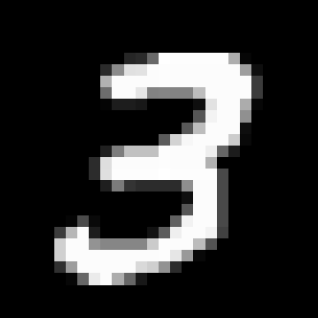


loading pre-trained model...

Img converted to gray

Img converted to tensor

Before the loop
Firing rate: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [19]:
# Test de un 3 del dataset del MNIST
image = Image.open("/home/isabel/Desktop/spikingjelly/examples/three.png")
display(image)
model = "/home/isabel/Desktop/spikingjelly/50epochsMNIST/lif_snn_mnist_simple50.ckpt"
testModel(image, model)

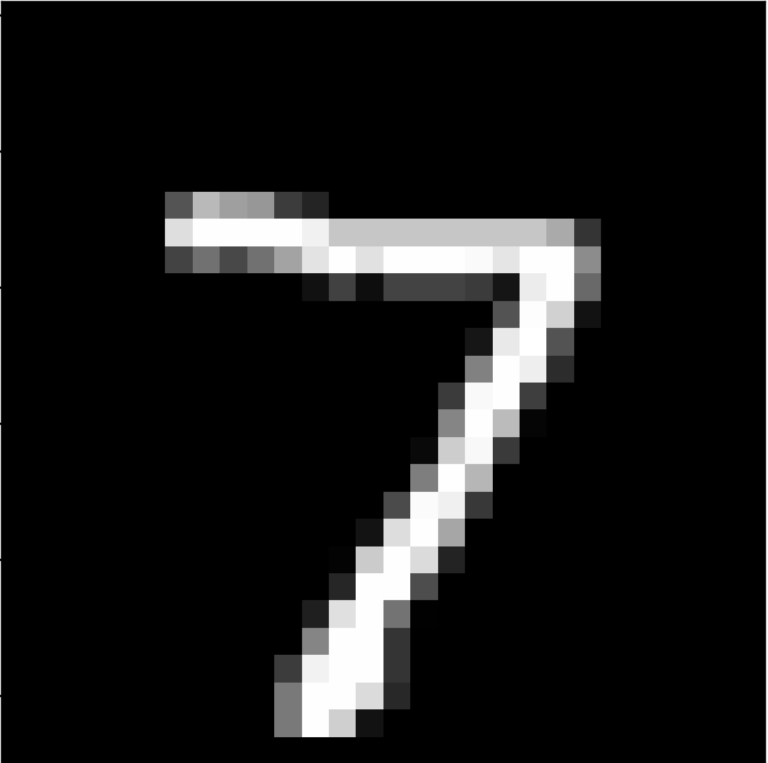


loading pre-trained model...

Img converted to gray

Img converted to tensor

Before the loop
Firing rate: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
# Test de un 7 del dataset del MNIST
image = Image.open("/home/isabel/Desktop/spikingjelly/examples/seven2.webp")
display(image)
model = "/home/isabel/Desktop/spikingjelly/50epochsMNIST/lif_snn_mnist_simple50.ckpt"
testModel(image, model)

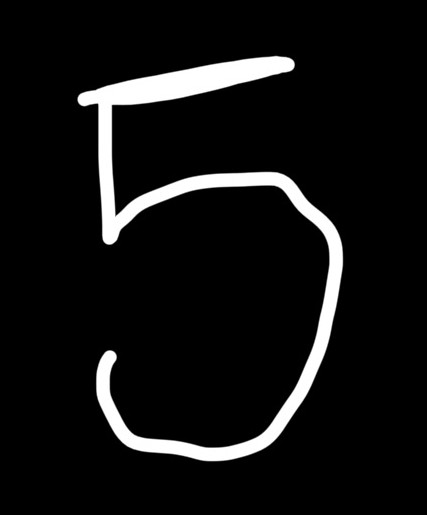


loading pre-trained model...

Img converted to gray

Img converted to tensor

Before the loop
Firing rate: [0.   0.   0.   0.22 0.   0.   0.   0.   0.   0.  ]


In [21]:
# Test de un 5 hecho a mano en un iPad
image = Image.open("/home/isabel/Desktop/spikingjelly/examples/fivedibujo.jpg")
display(image)
model = "/home/isabel/Desktop/spikingjelly/50epochsMNIST/lif_snn_mnist_simple50.ckpt"
testModel(image, model)

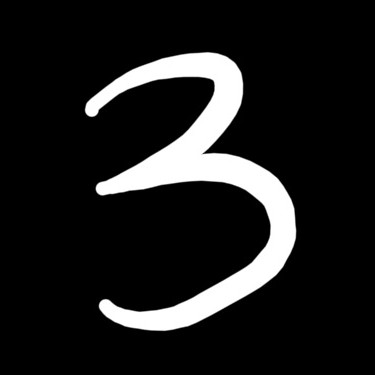


loading pre-trained model...

Img converted to gray

Img converted to tensor

Before the loop
Firing rate: [0.         0.         0.         0.98999995 0.         0.
 0.         0.         0.         0.        ]


In [24]:
# Test de un 3 hecho a mano en el iPad
image = Image.open("/home/isabel/Desktop/spikingjelly/examples/threedibujo.jpg")
display(image)
model = "/home/isabel/Desktop/spikingjelly/50epochsMNIST/lif_snn_mnist_simple50.ckpt"
testModel(image, model)